# Tensor Flow Example - MNIST dataset

The code for this example was taken from
https://keras.io/examples/vision/mnist_convnet/

It uses a convolution neural network to train the model.  I also added a few things to help with visualization of the results.

-John Wallin, MTSU

In [ ]:
# You may need to uncomment the following lines if you aren't running this notebook on Google Colab
# and they aren't installed yet.
#!pip install tensorflow
#!pip install matplotlib
#!pip install matplotlib
#!pip install seaborn

In [1]:
# uncomment if you have problems with your library in colab

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The code is taken directly from the website reference above.

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 8s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
# Now that our model is defined and our data set if prepped, we can train the model.

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 9ms/step - loss: 0.3801 - accuracy: 0.8839 - val_loss: 0.0970 - val_accuracy: 0.9735
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.1142 - accuracy: 0.9645 - val_loss: 0.0589 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.0465 - val_accuracy: 0.9893
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0414 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0350 - val_accuracy: 0.9913
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 

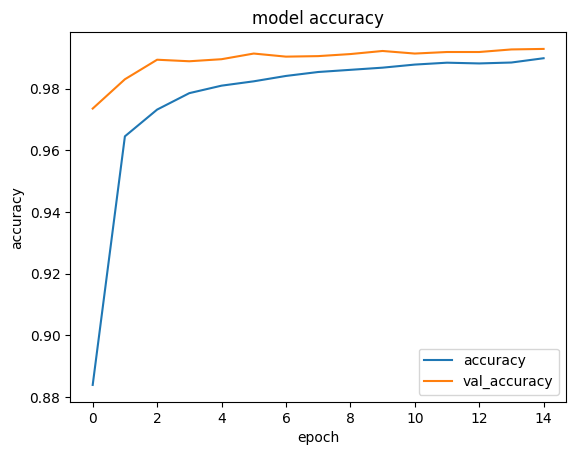

Text(0.5, 1.0, 'Model Loss')

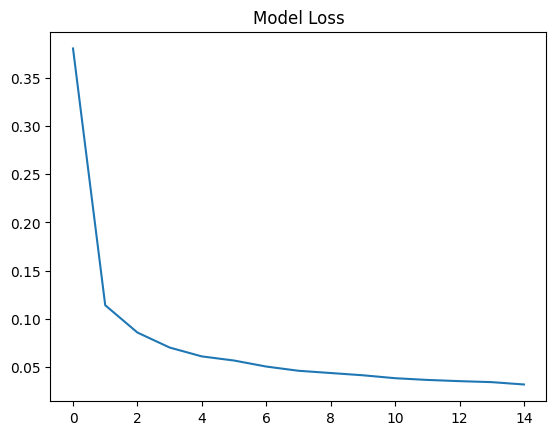

In [5]:

# we will plot accuracy and validation accuracy

plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Model Loss
plt.plot(history.history['loss'])
plt.title("Model Loss")

In [6]:
# this is a good way to evaluate the model - look at the test loss and test accuracy

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.023142565041780472
Test accuracy: 0.9918000102043152


313/313 [==============================] - 0s 1ms/step
Predicted:  9 Actual:  8
Category  :     0          1          2          3          4          5          6          7          8          9      
Predicted : 6.021e-07  1.342e-07  7.924e-05  3.661e-05  3.237e-04  1.029e-07  6.524e-08  3.481e-04  1.848e-02  9.807e-01  
Actual    : 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e+00  0.000e+00  

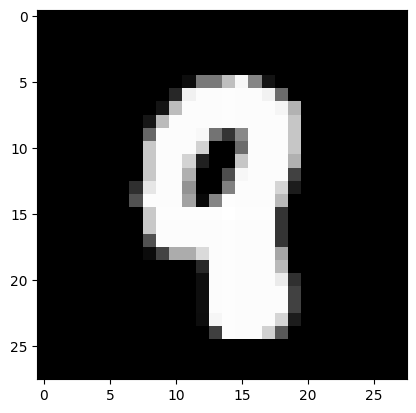

In [7]:
# we can examine each character to see what the predictions
# and compare it with the actual value and the image.
# For the most part, the predictions and the actual values
# agree.  However, the disagreements are interesting.
# We typically have two types of disagreements.
# 1) the model is wrong because the image is ambiguous.
# 2) the model is wrong because the image is mislabeled.



i= 947
img = x_test[i].reshape(28,28,)
plt.imshow(img, cmap='gray')

xx = model.predict(x_test)
print("Predicted: ", np.argmax(xx[i]), "Actual: ", np.argmax(y_test[i]))


# this block of code prints out the probabilities for each category
# instead of just the simple prediction.  It shows when things
# are ambiguous according to the model instead of just taking the
# top prediction.

print("Category  : ", end="")
for k in range(10):
    print("    %1.1i    " % k, end="  ")
print()

print("Predicted : ", end="")
for k in range(10):
    print("%5.3e" % xx[i][k], end="  ")
print()

print("Actual    : ", end="")
for k in range(10):
    print("%5.3e" % y_test[i][k], end="  ")

313/313 [==============================] - 0s 1ms/step
(5, 5)


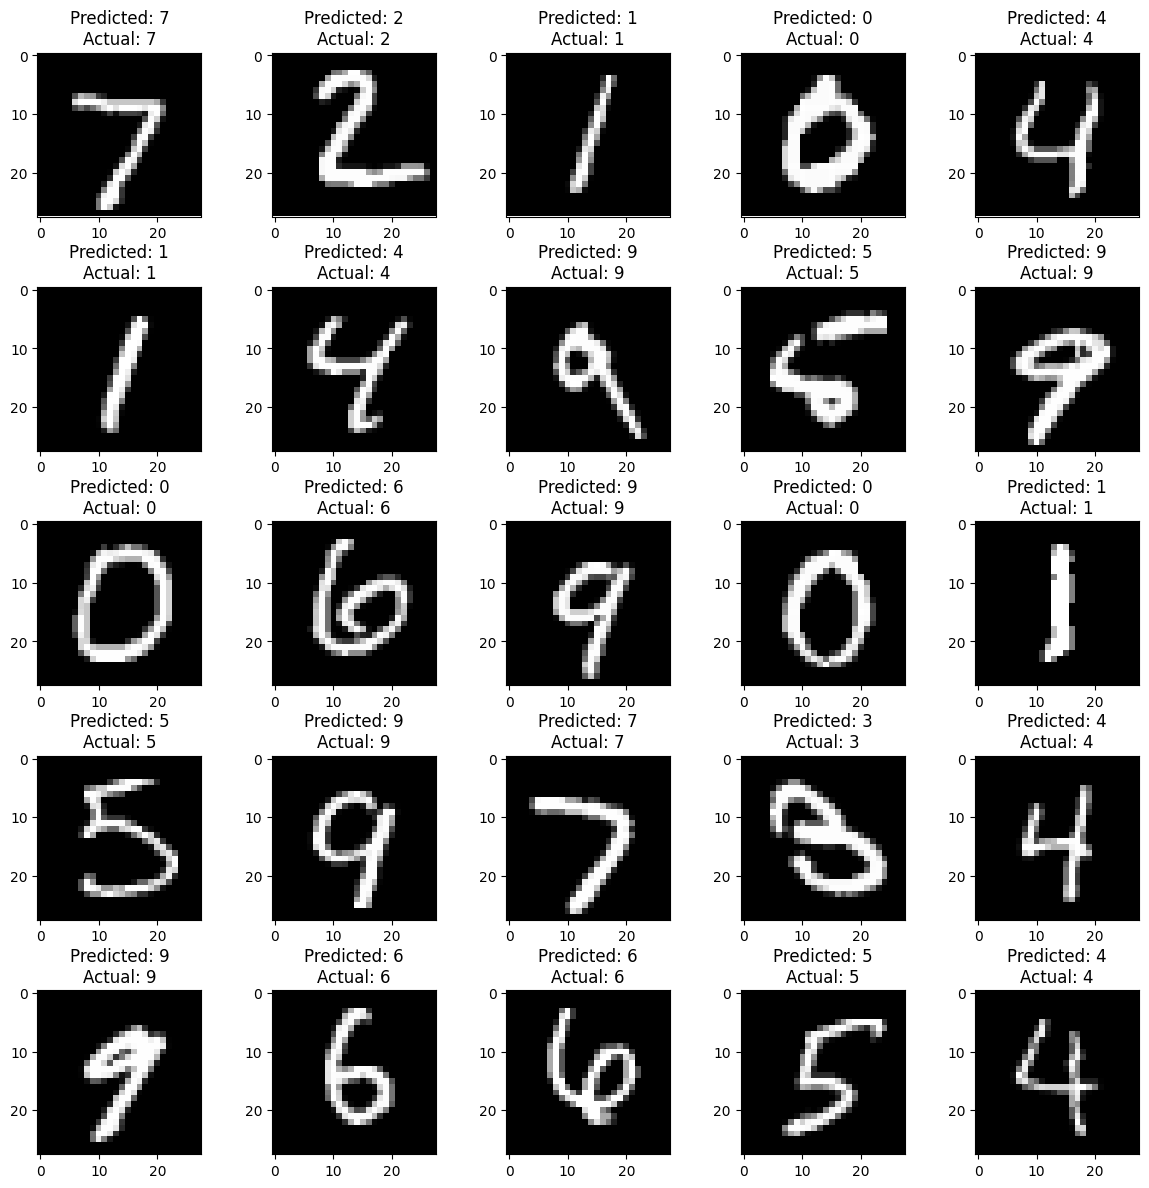

In [8]:
# this prints out an array of images, with the predicted and actual values

icount = 0
nx = 5
ny = 5

figure, ax = plt.subplots(nx, ny, figsize=(12, 12))
figure.tight_layout(pad=2.0)
xx = model.predict(x_test)
print(ax.shape)
for i in range(nx):
    for j in range(nx):
        img = x_test[icount].reshape(28,28,)
        ax[i][j].imshow(img, cmap='gray')


        # if you just want the actual values, uncomment this line and comment out the next line
#        ax[i][j].set_title("Actual: {}".format(np.argmax(y_test[icount])))
        ax[i][j].set_title("Predicted: {}".format(np.argmax(xx[icount])) + "\nActual: {}".format(np.argmax(y_test[icount])))
        icount = icount + 1




313/313 [==============================] - 0s 1ms/step
(5, 5)


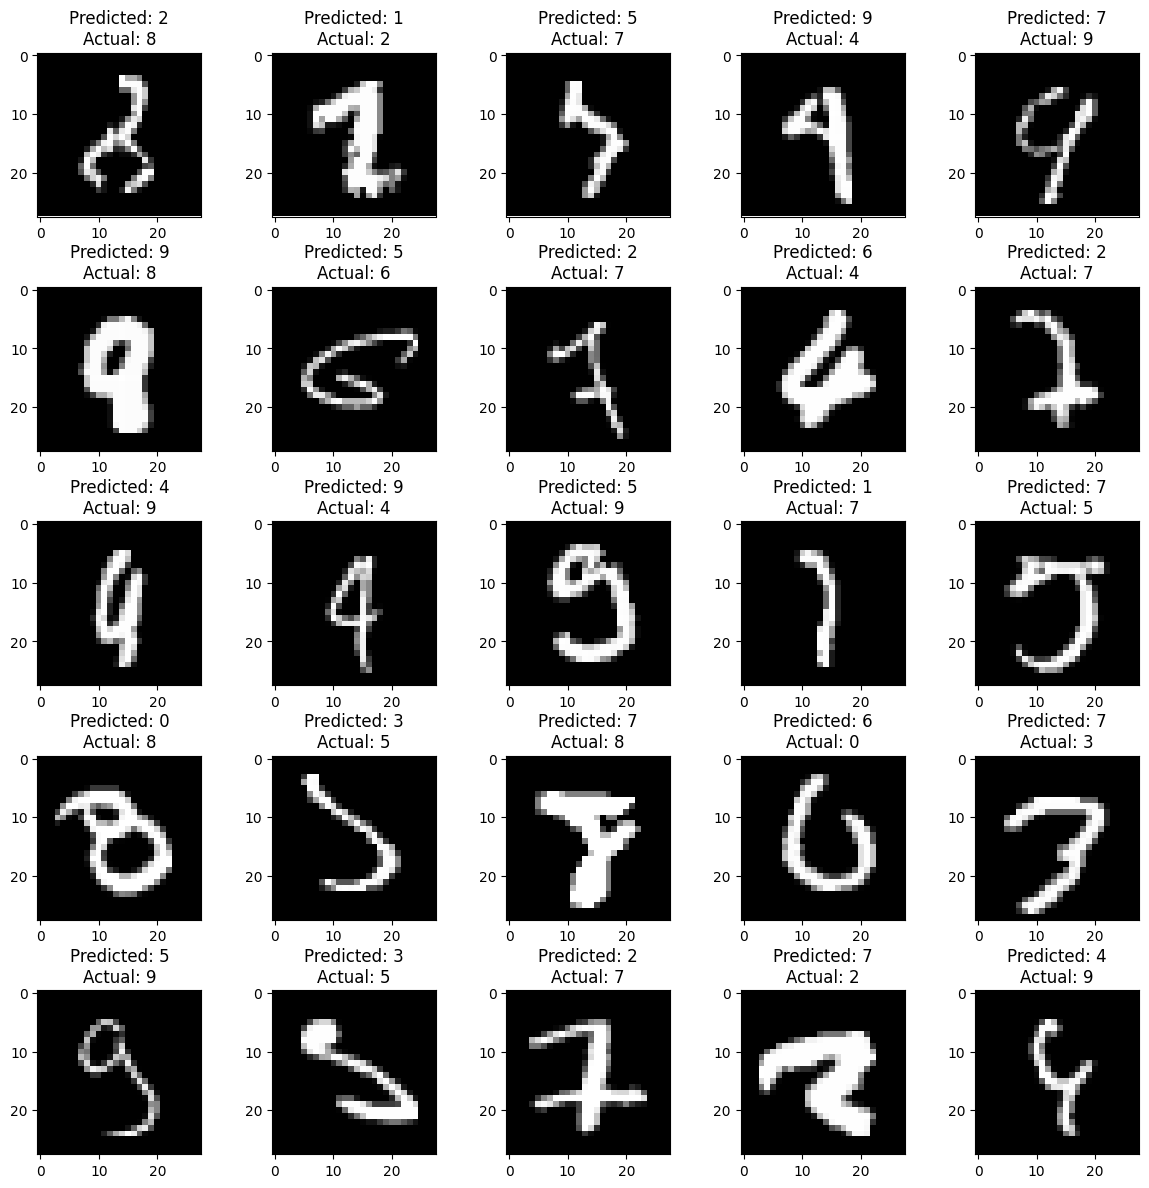

In [9]:

# this block of also prints out example images, but it only includes them
# misidentified images.
icount = 0
nx = 5
ny = 5
xx = model.predict(x_test)


# make a list of miscategorized images
ilist = []
for i in range(len(xx)):
    if np.argmax(xx[i]) != np.argmax(y_test[i]):
        ilist.append(i)


figure, ax = plt.subplots(nx, ny, figsize=(12, 12))
figure.tight_layout(pad=2.0)

print(ax.shape)
for i in range(nx):
    for j in range(nx):
        ii = ilist[icount]
        img = x_test[ii].reshape(28,28,)
        ax[i][j].imshow(img, cmap='gray')

        ax[i][j].set_title("Predicted: {}".format(np.argmax(xx[ii])) + "\nActual: {}".format(np.argmax(y_test[ii])))
        icount += 1


313/313 [==============================] - 0s 1ms/step


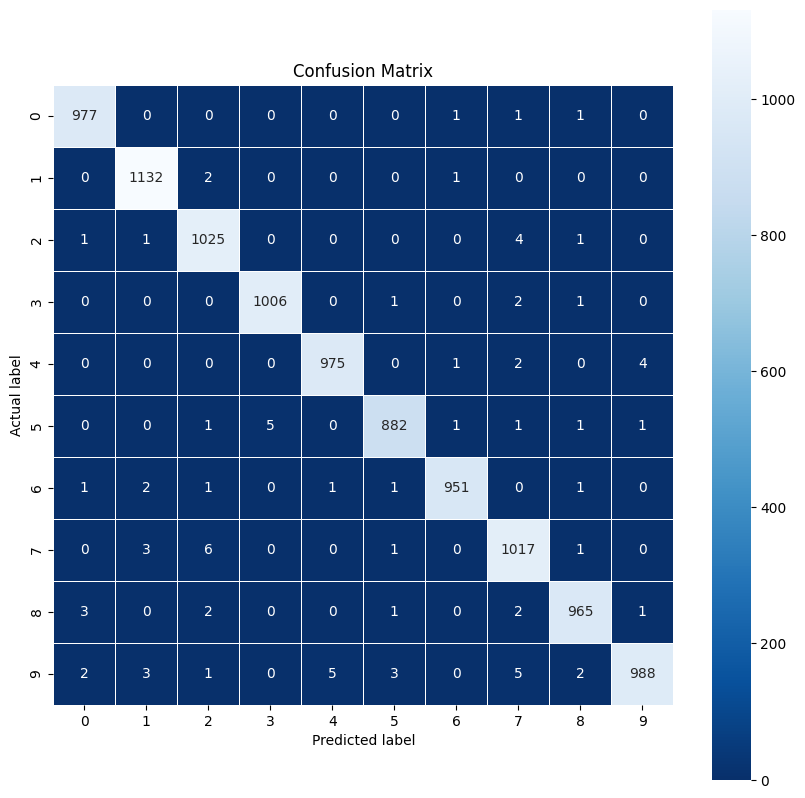

In [10]:
# create a confusion matrix for the test set
# confusion matrix is a table that is often used to describe the performance of a classification model

def confusion_matrix(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    n = np.unique(y_true).shape[0]
    cm = np.zeros((n, n))
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

y_true = y_test
y_pred = model.predict(x_test)


die = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(die, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [11]:



die = confusion_matrix(y_true, y_pred)

for i in range(10):
    # diagnol value
    correct = die[i, i]

    # total value for row
    total = sum(die[i, :])

    # accuracy for row
    accuracy = correct / total

    # precision for row
    precision = die[i, i] / sum(die[:, i])

    # recall for row
    recall = die[i, i] / sum(die[i, :])

    # f1 score for row
    f1 = 2 * precision * recall / (precision + recall)


    # confusion matrix for this digit from the precision, recall, accuracy, and f1 score for each digit
    print('Results digit %d:\nPrecision=%.2f, Recall=%.2f, Accuracy=%.2f, F1=%.2f' % (i, precision, recall, accuracy, f1))



#plt.figure(figsize=(10, 10))
#sns.heatmap(die, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues_r')
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')
#plt.title('Confusion Matrix')
#plt.show()

Results digit 0:
Precision=0.99, Recall=1.00, Accuracy=1.00, F1=0.99
Results digit 1:
Precision=0.99, Recall=1.00, Accuracy=1.00, F1=0.99
Results digit 2:
Precision=0.99, Recall=0.99, Accuracy=0.99, F1=0.99
Results digit 3:
Precision=1.00, Recall=1.00, Accuracy=1.00, F1=1.00
Results digit 4:
Precision=0.99, Recall=0.99, Accuracy=0.99, F1=0.99
Results digit 5:
Precision=0.99, Recall=0.99, Accuracy=0.99, F1=0.99
Results digit 6:
Precision=1.00, Recall=0.99, Accuracy=0.99, F1=0.99
Results digit 7:
Precision=0.98, Recall=0.99, Accuracy=0.99, F1=0.99
Results digit 8:
Precision=0.99, Recall=0.99, Accuracy=0.99, F1=0.99
Results digit 9:
Precision=0.99, Recall=0.98, Accuracy=0.98, F1=0.99
